# Homework 6

### Problem 1

Plot the MDF of Rocha Pinto & Maciel (1996, RPM96) and Haywood (2001, H01) including error
bars in both MDFs. You can estimate errors in RPM96 using Ntotal = 287 and error = √N. Give one
possible explanation for the peak at lower metallicity of RPM96 compared to the MDF by H01. Notice
that the MDF by H01 is in percentage, so you must divide it by 100.

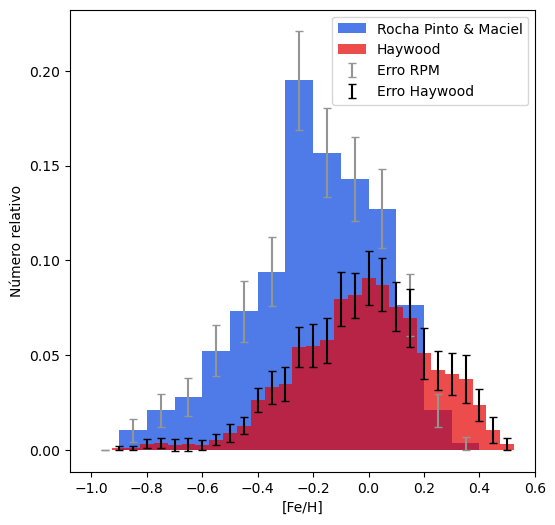

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

rpm=pd.read_csv('rpm.csv')
haywood=pd.read_csv('haywood.csv')

rpm['N']=rpm['N/Ntotal']*287
rpm['N_error']=np.sqrt(rpm['N'])/287

haywood['N']=haywood['percentage']/(100*2)
haywood['N_error']=haywood['percentage_error']/200

g1=plt.figure(figsize=[6,6])
plt.bar(rpm['RPM96_[Fe/H]'], rpm['N/Ntotal'], width=0.1, align='center', facecolor='xkcd:blue', alpha=0.7,label='Rocha Pinto & Maciel')
plt.bar(haywood['[Fe/H]'], haywood['N'], width=0.05, align='center', facecolor='xkcd:red', alpha=0.7, label='Haywood')
plt.errorbar(rpm['RPM96_[Fe/H]'], rpm['N/Ntotal'], yerr=rpm['N_error'], linestyle='', color='xkcd:grey', capsize=3, label='Erro RPM')
plt.errorbar(haywood['[Fe/H]'], haywood['N'], yerr=haywood['N_error'], linestyle='', color='xkcd:black', capsize=3, label='Erro Haywood')
plt.xlabel('[Fe/H]')
plt.ylabel('Número relativo')
plt.legend()
plt.savefig('histograma.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

The peak at lower metallicity found in RPM96 when compared to H01 can probably be atributted to the sampling of the 2 papers. RPM96 seems to have some kind of bias to low metalicitty stars. 

\begin{tabular}{rrr}
\toprule
[Fe/H] & log(z/z1) & S(Z) \\
\midrule
-0.900 & -2.245 & 0.001 \\
-0.850 & -2.195 & 0.002 \\
-0.800 & -2.145 & 0.006 \\
-0.750 & -2.095 & 0.009 \\
-0.700 & -2.045 & 0.012 \\
-0.650 & -1.995 & 0.015 \\
-0.600 & -1.945 & 0.018 \\
-0.550 & -1.895 & 0.023 \\
-0.500 & -1.845 & 0.032 \\
-0.450 & -1.795 & 0.045 \\
-0.400 & -1.745 & 0.072 \\
-0.350 & -1.695 & 0.105 \\
-0.300 & -1.645 & 0.140 \\
-0.250 & -1.595 & 0.194 \\
-0.200 & -1.545 & 0.249 \\
-0.150 & -1.495 & 0.307 \\
-0.100 & -1.445 & 0.387 \\
-0.050 & -1.395 & 0.468 \\
0.000 & -1.345 & 0.559 \\
0.050 & -1.295 & 0.646 \\
0.100 & -1.245 & 0.722 \\
0.150 & -1.195 & 0.792 \\
0.200 & -1.145 & 0.843 \\
0.250 & -1.095 & 0.885 \\
0.300 & -1.045 & 0.925 \\
0.350 & -0.995 & 0.962 \\
0.400 & -0.945 & 0.986 \\
0.450 & -0.895 & 0.997 \\
0.500 & -0.845 & 1.000 \\
\bottomrule
\end{tabular}



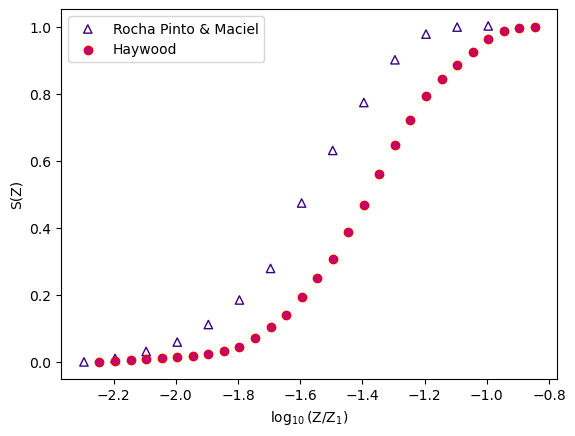

In [260]:
haywoodcum=np.cumsum(haywood['N'])
rpmcum=np.cumsum(rpm['N/Ntotal'])

solar = pd.read_csv("solar_abundances.csv")
solar['n_i/n_h']= 1e-12*(10**solar['a_sun'])
n_he_h = solar['n_i/n_h'][1] 
soma=sum(np.array(solar['atomic_wt'][2:])*np.array(solar['n_i/n_h'][2:]))
z_solar=soma/(1 + 4*(n_he_h) + soma)
z_fe_solar=solar['n_i/n_h'][25]*solar['atomic_wt'][25]/(1 + 4*(n_he_h) + soma)

fe_h_rpm=np.array(rpm['RPM96_[Fe/H]'])
fe_h_hm=np.array(haywood['[Fe/H]'])
n_fe_h_rpm=(10**(-4.5))*(10**fe_h_rpm)
n_fe_h_hm=(10**(-4.5))*(10**fe_h_hm)
z_fe_rpm=56*n_fe_h_rpm/1.4
z_fe_hm=56*n_fe_h_hm/1.4

z_present=2*z_solar
log_rpm=np.log10(z_fe_rpm/z_present)
log_hm=np.log10(z_fe_hm/z_present)

d_rpm={'[Fe/H]':rpm['RPM96_[Fe/H]'], 'log(z/z1)':log_rpm, 'S(Z)':rpmcum}
d_h={'[Fe/H]':haywood['[Fe/H]'], 'log(z/z1)':log_hm, 'S(Z)':haywoodcum}
rpm_f=pd.DataFrame(data=d_rpm)
haywood_f=pd.DataFrame(data=d_h)

print(haywood_f.to_latex(index=False, float_format="%.3f"))

plt.scatter(rpm_f['log(z/z1)'], rpm_f['S(Z)'], marker='^', c='None', edgecolors='xkcd:indigo', label='Rocha Pinto & Maciel')
plt.scatter(haywood_f['log(z/z1)'], haywood_f['S(Z)'],marker='o',c='xkcd:magenta', edgecolors='xkcd:red', label='Haywood')
plt.xlabel(r'$\log_{10}(\text{Z}/\text{Z}_1)$')
plt.ylabel(r'S(Z)')
plt.legend()
plt.savefig('cumulativa.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

/tmp/ipykernel_23936/469977803.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  expo=(LAM-lam-1)/LAM


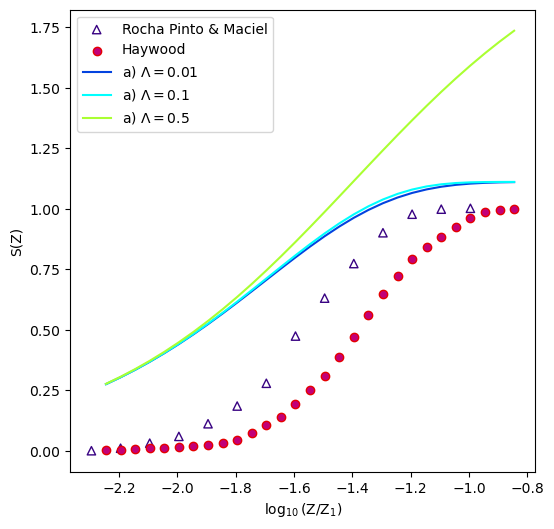

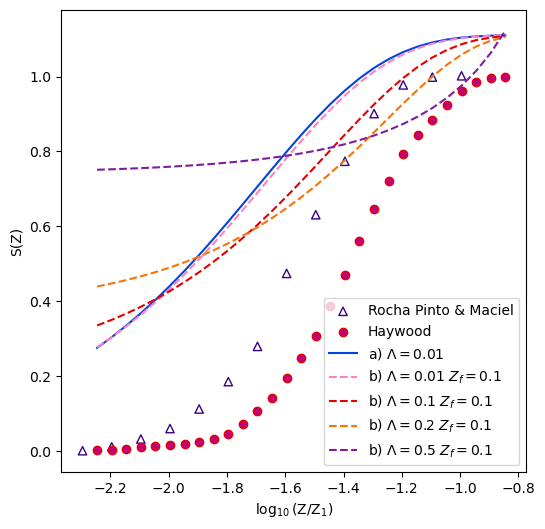

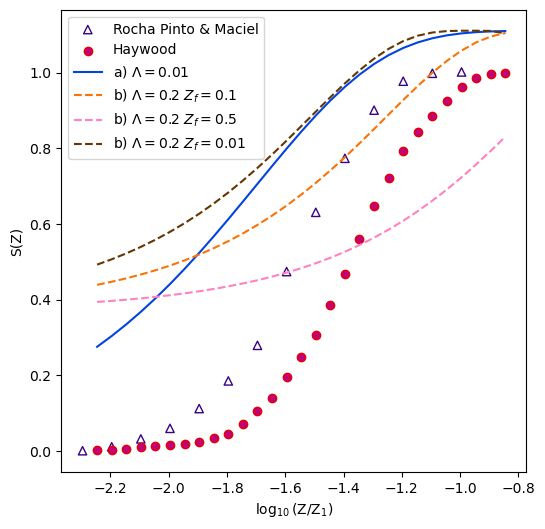

In [275]:
mu_1=0.1
y=0.02
log_rpm=z_fe_rpm/z_present
log_hm=z_fe_hm/z_present

def mu (l,z):
    nom=l-1
    den=l - (1- ((z)*l/y))**(1-1/l)
    return (1-nom/den)/(1-mu_1)

def mu_alt(LAM, lam, zf, z):
    nom=np.array(LAM*zf-LAM*z+y)
    den=np.array(LAM*zf + y)
    dentro=nom/den
    expo=(LAM-lam-1)/LAM
    bla=np.power(dentro, expo)
    bla2=bla -lam +LAM
    bla3=bla2/(1+lam-LAM)
    mu= bla3**(-1)
    sz=(1-mu)/(1-mu_1)
    return sz

treco=[]
for i in np.arange(0,1,0.1):
    treco.append(mu_alt(i,0,0.01,zs))
    
g2=plt.figure(figsize=[6,6])
plt.scatter(rpm_f['log(z/z1)'], rpm_f['S(Z)'], marker='^', c='None', edgecolors='xkcd:indigo', label='Rocha Pinto & Maciel')
plt.scatter(haywood_f['log(z/z1)'], haywood_f['S(Z)'],marker='o',c='xkcd:magenta', edgecolors='xkcd:red', label='Haywood')
plt.plot(haywood_f['log(z/z1)'], mu(0.001,log_hm), color='xkcd:blue', label=r'a) $\Lambda=0.01$')
plt.plot(haywood_f['log(z/z1)'], mu(0.1,log_hm), color='xkcd:cyan', label=r'a) $\Lambda=0.1$')
plt.plot(haywood_f['log(z/z1)'], mu(0.5,log_hm), color='xkcd:lime', label=r'a) $\Lambda=0.5$')
plt.xlabel(r'$\log_{10}(\text{Z}/\text{Z}_1)$')
plt.ylabel(r'S(Z)')
plt.legend()
plt.savefig('3a.png', dpi=300, bbox_inches='tight', pad_inches=0.1)

g3=plt.figure(figsize=[6,6])
plt.scatter(rpm_f['log(z/z1)'], rpm_f['S(Z)'], marker='^', c='None', edgecolors='xkcd:indigo', label='Rocha Pinto & Maciel')
plt.scatter(haywood_f['log(z/z1)'], haywood_f['S(Z)'],marker='o',c='xkcd:magenta', edgecolors='xkcd:red', label='Haywood')
plt.plot(haywood_f['log(z/z1)'], mu(0.001,log_hm), color='xkcd:blue', label=r'a) $\Lambda=0.01$')
plt.plot(haywood_f['log(z/z1)'], mu_alt(0.01, 0, 0.1, log_hm), linestyle='--', color='xkcd:pink', label=r'b) $\Lambda=0.01$ $Z_f =0.1$')
plt.plot(haywood_f['log(z/z1)'], mu_alt(0.1, 0, 0.1, log_hm), linestyle='--', color='xkcd:red', label=r'b) $\Lambda=0.1$ $Z_f =0.1$')
plt.plot(haywood_f['log(z/z1)'], mu_alt(0.2, 0, 0.1, log_hm), linestyle='--', color='xkcd:orange', label=r'b) $\Lambda=0.2$ $Z_f =0.1$')
plt.plot(haywood_f['log(z/z1)'], mu_alt(0.5, 0, 0.1, log_hm), linestyle='--', color='xkcd:purple', label=r'b) $\Lambda=0.5$ $Z_f =0.1$')
plt.xlabel(r'$\log_{10}(\text{Z}/\text{Z}_1)$')
plt.ylabel(r'S(Z)')
plt.legend()
plt.savefig('3b1.png', dpi=300, bbox_inches='tight', pad_inches=0.1)


g4=plt.figure(figsize=[6,6])
plt.scatter(rpm_f['log(z/z1)'], rpm_f['S(Z)'], marker='^', c='None', edgecolors='xkcd:indigo', label='Rocha Pinto & Maciel')
plt.scatter(haywood_f['log(z/z1)'], haywood_f['S(Z)'],marker='o',c='xkcd:magenta', edgecolors='xkcd:red', label='Haywood')
plt.plot(haywood_f['log(z/z1)'], mu(0.001,log_hm), color='xkcd:blue', label=r'a) $\Lambda=0.01$')
plt.plot(haywood_f['log(z/z1)'], mu_alt(0.2, 0, 0.1, log_hm), linestyle='--', color='xkcd:orange', label=r'b) $\Lambda=0.2$ $Z_f =0.1$')
plt.plot(haywood_f['log(z/z1)'], mu_alt(0.2, 0, 0.5, log_hm), linestyle='--', color='xkcd:pink', label=r'b) $\Lambda=0.2$ $Z_f =0.5$')
plt.plot(haywood_f['log(z/z1)'], mu_alt(0.2, 0, 0.01, log_hm), linestyle='--', color='xkcd:brown', label=r'b) $\Lambda=0.2$ $Z_f =0.01$')
plt.xlabel(r'$\log_{10}(\text{Z}/\text{Z}_1)$')
plt.ylabel(r'S(Z)')
plt.legend()
plt.savefig('3b2.png', dpi=300, bbox_inches='tight', pad_inches=0.1)


